## 1. Optimization-based Prescriptive Analytics 

In [7]:
import pandas as pd
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpBinary, value
df = pd.read_csv('adult.csv')
df = df.dropna() 
df = df.head(100) 
df['id'] = range(len(df)) 

In [8]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'id'],
      dtype='object')


In [9]:
prob = LpProblem('Minimize_Hours', LpMinimize)
x = LpVariable.dicts('select', df['id'], cat=LpBinary)
hours = dict(zip(df['id'], df['hours.per.week']))
# Objective: Minimize total hours-per-week
prob += lpSum([hours[i]*x[i] for i in df['id']])
# Constraint: Select at least 10 individuals with education 'Bachelors'
edu_ids = df[df['education'] == 'Bachelors']['id']
prob += lpSum([x[i] for i in edu_ids]) >= 10
# Constraint: Select only individuals aged between 25 and 50
for i, row in df.iterrows():
    if not (25 <= row['age'] <= 50):
        prob += x[row['id']] == 0

prob.solve()
selected = [i for i in df['id'] if x[i].varValue == 1]
print('Selected IDs:', selected)
print('Total hours-per-week:', value(prob.objective))

Selected IDs: [19, 20, 40, 55, 58, 79, 84, 85, 91, 95]
Total hours-per-week: 458.0


## 2. Simulation-based Prescriptive Analytics

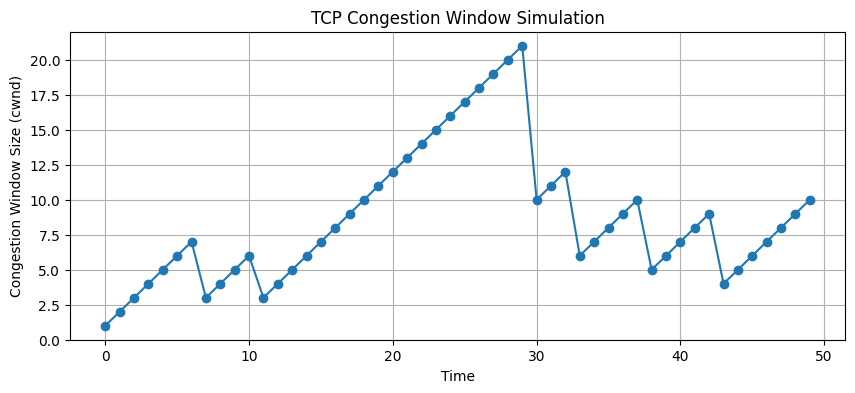

In [10]:
# Simple TCP Congestion Window Simulation
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
time_steps = 50
cwnd = [1]
for t in range(1, time_steps):
    if np.random.rand() < 0.1:  # 10% chance of packet loss
        cwnd.append(max(1, cwnd[-1] // 2))
    else:
        cwnd.append(cwnd[-1] + 1)
plt.figure(figsize=(10,4))
plt.plot(range(time_steps), cwnd, marker='o')
plt.title('TCP Congestion Window Simulation')
plt.xlabel('Time')
plt.ylabel('Congestion Window Size (cwnd)')
plt.grid(True)
plt.show()

## 3. Reinforcement Learning

In [11]:
import pandas as pd
np.random.seed(42)
n_steps = 20
prob_success = 0.6  # Probability of reward
interval = 5
results = []
reward_sum = 0
for t in range(1, n_steps+1):
    reward = np.random.binomial(1, prob_success)
    reward_sum += reward
    if t % interval == 0:
        results.append({'Time': t, 'Interval': f'{t-interval+1}-{t}', 'Reward Calculation': reward_sum})
        reward_sum = 0
df_results = pd.DataFrame(results)
df_results

,Time,Interval,Reward Calculation
0,5,1-5,3
1,10,6-10,2
2,15,11-15,3
3,20,16-20,5
